# 0. Importing the Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os, sys, re, json, time
import itertools, collections
from importlib import reload
from IPython.display import display
import scipy.sparse
import nltk
from w266_common import utils, vocabulary, tf_embed_viz

/home/s_hamdani/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# 1. Getting Data

In [2]:
combined_df = pd.read_csv('clean_tweets.csv')

In [3]:
# getting the timestamp column in proper format
combined_df['timestamp'] = pd.to_datetime(combined_df['timestamp'], infer_datetime_format=True)

In [4]:
# extracting date from timestamp
combined_df['date'] = combined_df['timestamp'].map(lambda x:x.date())

We only want data from 4th March, 2019 onwards. This is the period we have chosen to explore.

In [5]:
combined_df = combined_df[combined_df['date'] >= pd.to_datetime('2019-03-04').date()]

In [6]:
combined_df.head()

tweet_id ticker           timestamp  \
0  1105519541147262976      C 2019-03-12 17:22:00   
1  1105519387367227393      C 2019-03-12 17:22:00   
2  1105517203074371584      C 2019-03-12 17:13:00   
3  1105288514155929601      C 2019-03-12 02:04:00   
4  1104039312251858945   DWDP 2019-03-08 15:20:00   

                                               tweet        date  
0              <s>  c  the only big bank i buy  </s>  2019-03-12  
1                        <s> on the density of  </s>  2019-03-12  
2  <s> ucla is the of  c is so good at spinning a...  2019-03-12  
3                                         <s> < </s>  2019-03-12  
4         <s> in inc  after decline in shorted  </s>  2019-03-08

In [7]:
combined_df.shape

(2572925, 5)

In [8]:
# removing all the duplicate tweets
combined_df.drop_duplicates(inplace=True)

In [9]:
combined_df.shape

(2572925, 5)

# 2. Adding Sentiment Score to Each Tweet

For the sentiment score for our tweets, we decided to use 'vaderSentimentAnalyzer'. As per the definition from the creators:

**VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media, and works well on texts from other domains.**

Since we are exclusively dealing with sentimenn analysis of social media messages (tweets, in our case), VADER seemed the appropriate choice. 

In [10]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [11]:
# extracting sentiment score for each tweet
# we are interested in only the compound polarity score
# details about this number can be found in paper accompanying this notebook

analyzer = SentimentIntensityAnalyzer()
combined_df['compound'] = combined_df['tweet'].map(
    lambda x: list(analyzer.polarity_scores(x).values())[3])

In [12]:
# # extracting day_name, day, and day_of_week in case we need it for analysis
# combined_df['day_name'] = combined_df['timestamp'].map(lambda x: x.day_name())
# combined_df['day'] = combined_df['timestamp'].map(lambda x: x.day)
# combined_df['day_of_week'] = combined_df['timestamp'].map(lambda x: x.dayofweek)

In [13]:
#combined_df.to_csv('tweets_with_sentiment.csv')
#combined_df = pd.read_csv('tweets_with_sentiment.csv', index_col=False)

In [14]:
combined_df.shape

(2572925, 6)

In [15]:
combined_df.sort_values(by = 'compound', ascending=False, inplace=True)

In [16]:
combined_df.head()

tweet_id ticker           timestamp  \
2406314  1111066228028772353    MCD 2019-03-28 00:43:00   
1560917  1108837319778406406   MSFT 2019-03-21 21:06:00   
2303789  1109127331610853379      V 2019-03-22 16:18:00   
2303839  1109126400894816258      V 2019-03-22 16:15:00   
1850356  1110920183894421505   INTC 2019-03-27 15:03:00   

                                                     tweet        date  \
2406314  <s> seth rich seth rich seth rich seth rich se...  2019-03-28   
1560917  <s> pagar entre 100 y 180 euros al ao por un s...  2019-03-21   
2303789  <s> charlize sky love i love you my life sky i...  2019-03-22   
2303839  <s> charlize sky love i love you my life sky i...  2019-03-22   
1850356  <s> apex legends is in apex and they have to b...  2019-03-27   

         compound  
2406314    0.9972  
1560917    0.9944  
2303789    0.9923  
2303839    0.9923  
1850356    0.9920

## 2.1 Sample Tweets to Manually Ascertain Polarity Score Quality

This portion is aimed at looking at few samples of tweets and manually see if the polarity scores sit well with the content of the tweet.
We will look at all three cases: positive, neutral and negative example tweets.

#### 2.1.1 Positive Tweets

In [17]:
for row in combined_df.loc[combined_df['compound'] > 0.05]['tweet'][0:10]:
    print(row)
    print('\n')

<s> seth rich seth rich seth rich seth rich seth rich seth rich seth rich seth rich seth rich seth rich seth rich seth rich seth rich seth rich seth rich seth rich seth rich seth rich seth rich seth rich </s>


<s> pagar entre 100 y 180 euros al ao por un servicio de que de ser y encima va como la xd xd xd xd xd xd xd xd xd xd xd xd xd </s>


<s> charlize sky love i love you my life sky i do not stop you from thinking love please my life i ask you with love heaven help me with the visa to be able to see the united states i love you i want to be with you love heaven please my name is jose luis noboa giler sky  </s>


<s> charlize sky love i love you my life sky i do not stop you from thinking love please my life i ask you with love heaven help me with the visa to be able to see the united states i love you i want to be with you love heaven please my name is jose luis noboa giler  </s>


<s> apex legends is in apex and they have to be at least one for a while but i wanna is it gonna was 

#### 2.1.2 Negative Tweets

In [18]:
for row in combined_df.loc[combined_df['compound'] <= -0.05]['tweet'][0:10]:
    print(row)
    print('\n')

<s> i cant get over someone tweeting how some people survive the and how they would eat their pets okay come talk to me about become rabid after you can order a big mac at without fucking up ok </s>


<s> netflix has never had such a great selection of movies impressed </s>


<s> we know russia interfered in our election 4 we know everyone surrounding trump met  lied about we know trump took word over american we do not know why this president would do nothing about attacks on our nation by a foreign </s>


<s> not so well no so </s>


<s> but antitrust fears probably caused ibm not to demand exclusivity on original os for </s>


<s> not one party is without conflict within and there are some calling for a general what will that it matter who is in all at if listen to the what is the </s>


<s>  verizon this confirms that i will never use your maurice german should be applauded for his not suspended without shame on some rules should be broken if it means saving a  </s>


<s> not kiddi

#### 2.1.3 Neutral Tweets

In [19]:
for row in combined_df.loc[(combined_df['compound'] > -0.05) & (combined_df['compound'] < 0.05)]\
['tweet'][0:10]:
    print(row)
    print('\n')

<s> i fully agree with at the the plane is not safe to fly canada just grounded the but i know that in the when the fix is put out for the system bug that may be causing these i will fly on the that the predecessor to </s>


<s> that is the reason of people are now looking hard at that particular approving the as the same type was financially very advantageous to of as they can advertise no pilot type ratings are </s>


<s> really glad that this walmart is less then a minute away from my house cause i bought the wrong epoxy </s>


<s>  due to weaknesses in the sha1 algorithm and to align to industry standards microsoft will only sign windows updates using the more secure algorithm </s>


<s> a family with a  member working in  ireland refused is new zealand really a tolerant  </s>


<s> my fatal flaw is thoroughly enjoying the reputation stadium tour movie on netflix </s>


<s> the drugmaker eli lilly will begin selling a cheaper version of its most popular in an effort to head off cri

## 2.2 Data Exploration with Aggregate Sentiment

In [20]:
# get counts of positive, neutral and negative tweets
def count_sentiments(sentiment):

    if sentiment >= 0.05:
        return 1
    elif (sentiment > -0.05) and (sentiment < 0.05):
        return 0
    else:
        return -1

In [21]:
# new column to determine if tweet is positive or negative
combined_df['pos/neg'] = combined_df['compound'].map(count_sentiments)

In [22]:
# new dataframe to count individual sentiment tweets per day
sentiment_counts = pd.DataFrame(combined_df.groupby(['date', 'pos/neg'])['tweet'].agg('count'))

In [23]:
sentiment_counts.head()

tweet
date       pos/neg       
2019-03-04 -1        4284
            0       12525
            1        9139
2019-03-05 -1        5208
            0       14300

In [24]:
# groupby dates to get counts of tweets by day
sent_agg_by_day = pd.DataFrame(combined_df.groupby('date')['compound'].agg('count'))

In [25]:
sent_agg_by_day.head()

compound
date                
2019-03-04     25948
2019-03-05     30296
2019-03-06     32652
2019-03-07     31029
2019-03-08     26455

In [26]:
# merging datasets to get counts of positive, negative and neutral tweets daily
merged_dataset = sentiment_counts.merge(sent_agg_by_day, left_index=True, right_index=True)

In [27]:
merged_dataset = merged_dataset.reset_index()

In [28]:
merged_dataset.head()

date  pos/neg  tweet  compound
0  2019-03-04       -1   4284     25948
1  2019-03-04        0  12525     25948
2  2019-03-04        1   9139     25948
3  2019-03-05       -1   5208     30296
4  2019-03-05        0  14300     30296

In [29]:
#merged_dataset = merged_dataset.unstack()
merged_dataset = merged_dataset.pivot_table(index='date', values='tweet', columns='pos/neg')

In [30]:
merged_dataset.rename(columns={-1: 'neg', 0:'neutral', 1:'pos'}, inplace=True)

In [31]:
merged_dataset['abs_sentiment'] = merged_dataset['pos']-merged_dataset['neg']
merged_dataset['rel_sentiment'] = (merged_dataset['pos']-merged_dataset['neg'])/(merged_dataset['pos']+merged_dataset['neg'])

The relative and absolute sentiment are calculated using the aggregate number of positive and negative tweets. 

In [32]:
merged_dataset.head()

pos/neg      neg  neutral    pos  abs_sentiment  rel_sentiment
date                                                          
2019-03-04  4284    12525   9139           4855       0.361693
2019-03-05  5208    14300  10788           5580       0.348837
2019-03-06  5503    15782  11367           5864       0.347599
2019-03-07  5123    15093  10813           5690       0.357053
2019-03-08  4127    12941   9387           5260       0.389226

In [33]:
avg_sent_by_day = combined_df.groupby('date')['compound'].agg('mean')

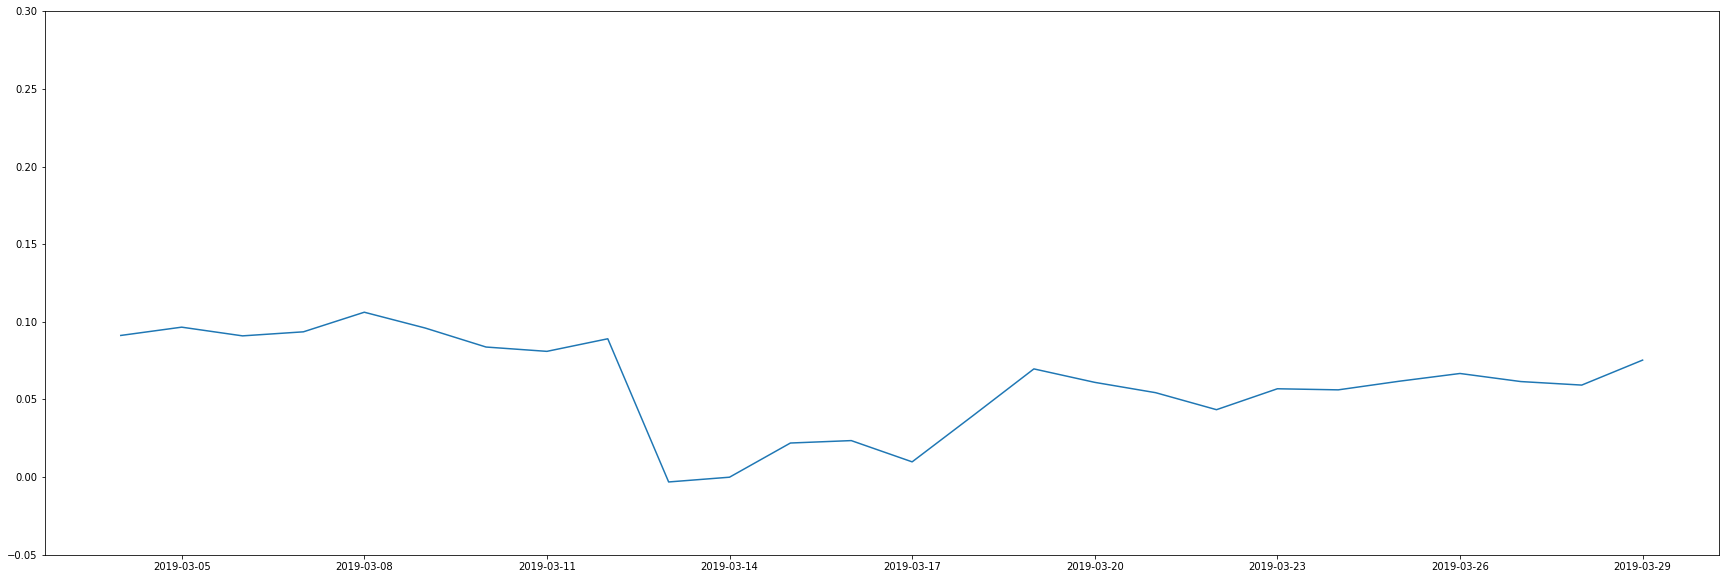

In [35]:
plt.figure(figsize=(30,10))
plt.ylim(-0.05,0.3)
plt.plot(avg_sent_by_day);

We notice that, in general, the attitude manifested in the tweets gathered by us has a neutral-positive bend.

In [36]:
pos_individual_sent_by_day = merged_dataset['pos']
neg_individual_sent_by_day = merged_dataset['neg']
neutral_individual_sent_by_day = merged_dataset['neutral']

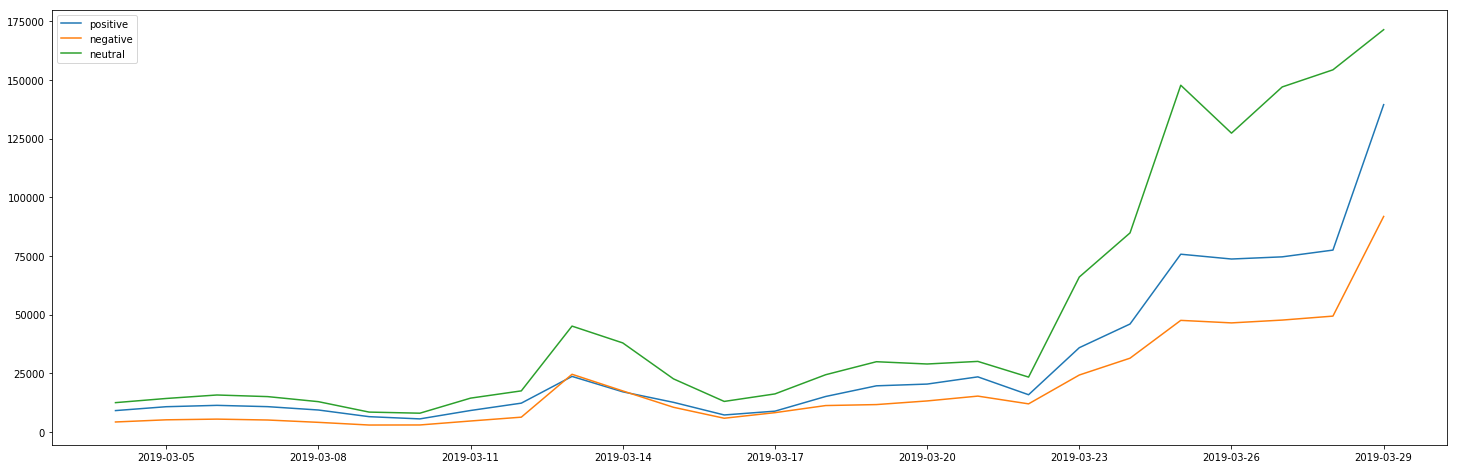

In [37]:
fig, ax = plt.subplots(figsize=(25,8));
ax.plot(pos_individual_sent_by_day, label='positive')
ax.plot(neg_individual_sent_by_day, label='negative');
ax.plot(neutral_individual_sent_by_day, label='neutral');
leg = ax.legend();

It is noticed that there are considerable increase in number of tweets as the month went on. This is because of our data gathering strategy which was split in two different ways. In the latter half of our data gathering process, we had much more flexible approach to compiling tweets, and that is reflected in the above trend clearly.

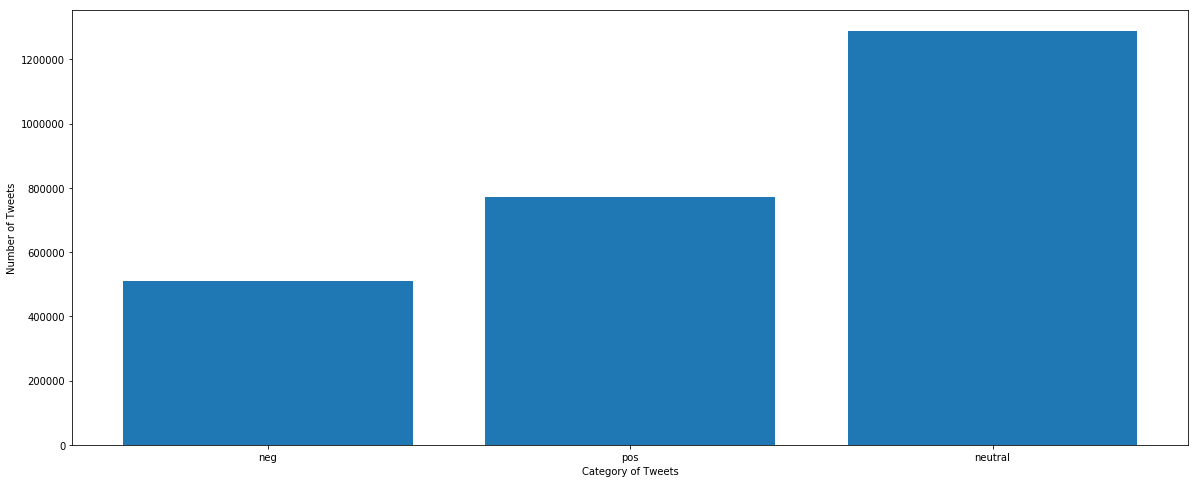

In [38]:
df_for_barplot = merged_dataset[['neg', 'pos', 'neutral']]
df_bar_plot_v = df_for_barplot.sum()

plt.figure(figsize=(20,8))
plt.ylabel('Number of Tweets')
plt.xlabel('Category of Tweets')
plt.bar(list(df_bar_plot_v.index), list(df_bar_plot_v.values));

# 3. Stock Data

## 3.1 Aggregate Stock Data (S&P500 Top 500 and S&P500 top 50)

We downloaded two different forms of datasets for stocks.

1) S&P500 Complete Index

2) S&P500 Top 50 Stocks index (the companies we gathered the tweets for)

In [39]:
# data for complete S&P500 index (gathered for analysis)
agg_sp500 = pd.read_csv('^GSPC.csv')
agg_sp500.set_index('Date', inplace=True)
agg_sp500.head()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2018-12-28  2498.770020  2520.270020  2472.889893  2485.739990  2485.739990   
2018-12-31  2498.939941  2509.239990  2482.820068  2506.850098  2506.850098   
2019-01-02  2476.959961  2519.489990  2467.469971  2510.030029  2510.030029   
2019-01-03  2491.919922  2493.139893  2443.959961  2447.889893  2447.889893   
2019-01-04  2474.330078  2538.070068  2474.330078  2531.939941  2531.939941   

                Volume  
Date                    
2018-12-28  3702620000  
2018-12-31  3442870000  
2019-01-02  3733160000  
2019-01-03  3822860000  
2019-01-04  4213410000

In [40]:
# S&P500 Top 50 Dataset
# We will use the values from this dataset for our causality analysis
agg_sp50 = pd.read_excel('S&PTop50 Aggregate Data-.xls')
agg_sp50.rename(columns={'Effective date ':'date'}, inplace=True)
agg_sp50.set_index('date', inplace=True)

In [41]:
agg_sp50 = pd.DataFrame(agg_sp50['S&P 500 Top 50'])
agg_sp50.head()

S&P 500 Top 50
date                      
2018-12-31         1999.51
2019-01-02         2008.08
2019-01-03         1947.96
2019-01-04         2019.01
2019-01-07         2029.65

## 3.2 Analyzing Stock Market Behaviour

In [42]:
# dataframe constructed that will eventually be used for causality analysis
df_for_causality = merged_dataset.merge(agg_sp50, left_index=True, right_index=True)

The dataframe captures tweets and their sentiments, along with S&P500 Top 50 Index, from 4th March 2019 to 29th March 2019.

In [43]:
df_for_causality.head()

neg  neutral    pos  abs_sentiment  rel_sentiment  S&P 500 Top 50
date                                                                          
2019-03-04  4284    12525   9139           4855       0.361693         2208.68
2019-03-05  5208    14300  10788           5580       0.348837         2210.25
2019-03-06  5503    15782  11367           5864       0.347599         2199.74
2019-03-07  5123    15093  10813           5690       0.357053         2180.94
2019-03-08  4127    12941   9387           5260       0.389226         2177.70

### 3.2.1 With Absolute Closing Price Values

In [44]:
stocks = df_for_causality['S&P 500 Top 50']

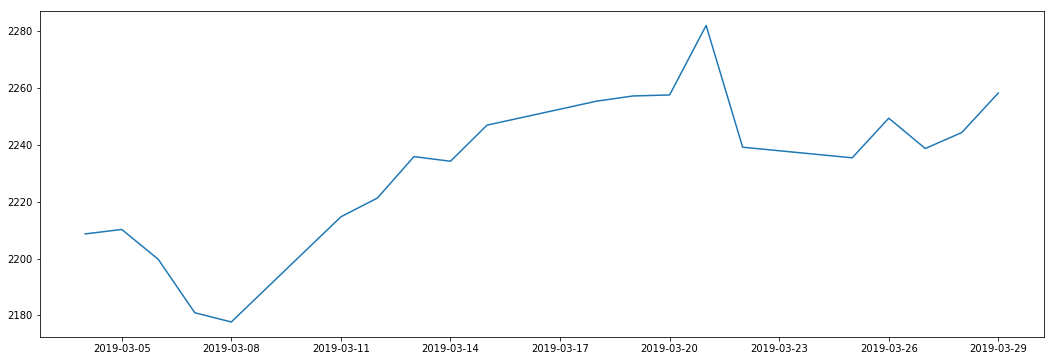

In [45]:
# Plotting stocks behaviour time series
plt.figure(figsize=(18,6))
plt.plot(stocks)
plt.show();

We draw an autocorrelation plot to determine how much does the stock price correlate with its lagged value.

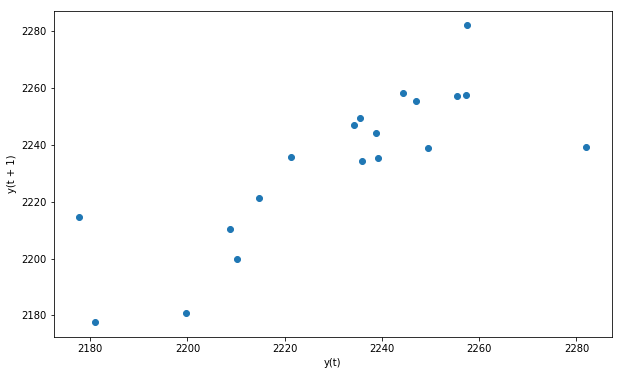

In [46]:
# Creating Autocorrelation plot
from pandas.plotting import lag_plot
plt.figure(figsize=(10,6))
lag_plot(stocks)
plt.show();

In [48]:
# getting correlation matrix for lagged values
values = pd.DataFrame(stocks.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.803534
t+1  0.803534  1.000000


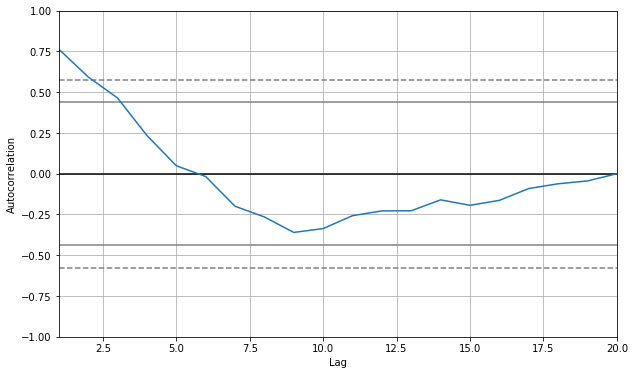

In [49]:
# autocorrelation plot
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(10,6))
autocorrelation_plot(stocks)
plt.show();

We can clearly see that there is a definite relationship between lagged values of stock price and stock price on certain day.

Further connection is established by an Autoregressive model, which is used for Univariate Time Series.

In [50]:
from statsmodels.tsa.ar_model import AR

# split dataset
X = stocks.values
# train autoregression
model = AR(X)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

model_fit.summary()

Lag: 8
Coefficients: [ 2.19249637e+03  1.05702162e-01 -1.17341363e-01  2.45042828e-01
 -4.22081749e-02 -4.44440521e-02  3.69473989e-01 -4.61602602e-01
 -3.15810014e-02]


### 3.2.2 Using Log-Return values

In finance, it is a common practice to use log-return values of stock price instead of absolute value. We transform our dataset to include log-return values (and corresponding percentage changes, just for comparison)

In [51]:
stocks = pd.DataFrame(stocks)

In [52]:
stocks['pct_change'] = stocks['S&P 500 Top 50'].pct_change()
stocks['log_ret'] = np.log(stocks['S&P 500 Top 50'])\
- np.log(stocks['S&P 500 Top 50'].shift(1))

In [53]:
stocks.fillna(0, inplace=True)

In [54]:
log_return = stocks['log_ret']

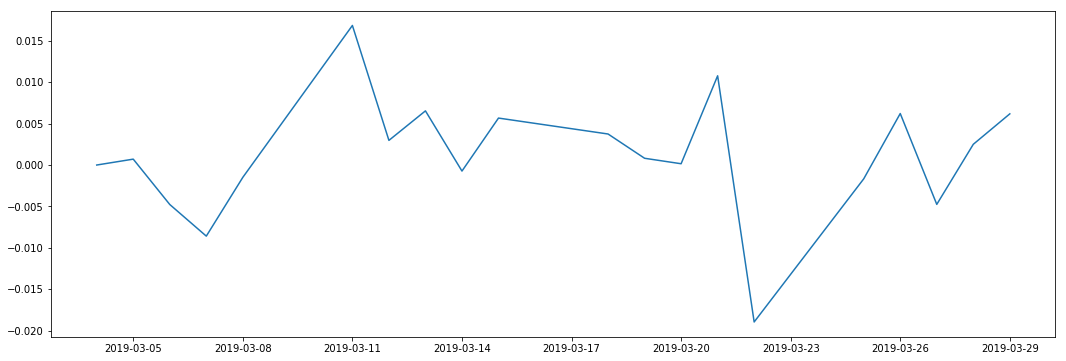

In [55]:
plt.figure(figsize=(18,6))
plt.plot(log_return)
plt.show();

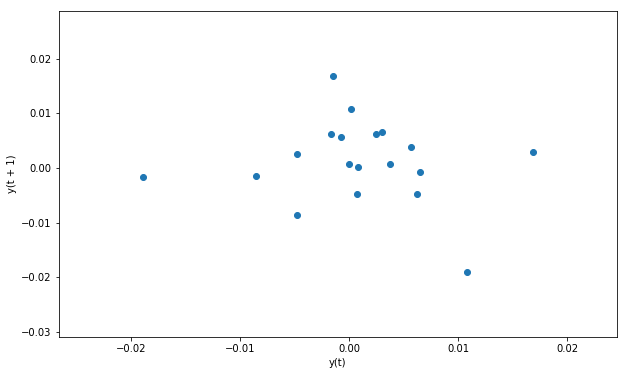

In [56]:
# Creating Autocorrelation plot
from pandas.plotting import lag_plot
plt.figure(figsize=(10,6))
lag_plot(log_return)
plt.show();

In [57]:
# getting correlation matrix for lagged values
values = pd.DataFrame(log_return.values)
dataframe = pd.concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000 -0.112558
t+1 -0.112558  1.000000


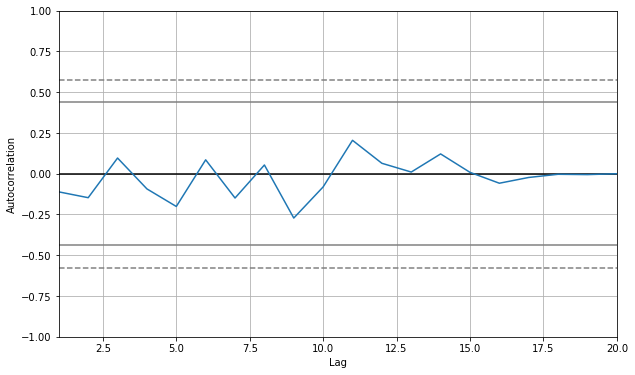

In [58]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(10,6))
autocorrelation_plot(log_return)
plt.show();

In [59]:
from statsmodels.tsa.ar_model import AR
# split dataset
X = log_return.values
# train autoregression
model = AR(X)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

model_fit.summary()

Lag: 8
Coefficients: [ 2.56513270e-04 -3.17672122e-01 -2.52004437e-01  2.82283059e-01
  6.05762046e-02 -4.44729778e-02  2.19733362e-01 -3.98043964e-01
  2.17318146e-01]


# 4. Causality Analysis

In [60]:
df_for_causality['pct_change'] = df_for_causality['S&P 500 Top 50'].pct_change()
df_for_causality['log_ret'] = np.log(df_for_causality['S&P 500 Top 50'])\
- np.log(df_for_causality['S&P 500 Top 50'].shift(1))

In [61]:
df_for_causality.fillna(value=0, inplace=True)

In [62]:
df_for_causality.head()

neg  neutral    pos  abs_sentiment  rel_sentiment  \
date                                                             
2019-03-04  4284    12525   9139           4855       0.361693   
2019-03-05  5208    14300  10788           5580       0.348837   
2019-03-06  5503    15782  11367           5864       0.347599   
2019-03-07  5123    15093  10813           5690       0.357053   
2019-03-08  4127    12941   9387           5260       0.389226   

            S&P 500 Top 50  pct_change   log_ret  
date                                              
2019-03-04         2208.68    0.000000  0.000000  
2019-03-05         2210.25    0.000711  0.000711  
2019-03-06         2199.74   -0.004755 -0.004766  
2019-03-07         2180.94   -0.008546 -0.008583  
2019-03-08         2177.70   -0.001486 -0.001487

### 4.1 Check if time series are stationary

We test if our time series are stationary. For this purpose we utilise the ADF test, applied to a single series at a time (univariate time series). We utilised the python implementation available via statsmodel.

In [63]:
# ADF (Augmented Dickey Fuller) Test
#define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag=8)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic',
                                             'p-value','#Lags Used',
                                             'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [64]:
adf_test(df_for_causality['S&P 500 Top 50'])

Results of Dickey-Fuller Test:
Test Statistic                -1.485676e+01
p-value                        1.743628e-27
#Lags Used                     8.000000e+00
Number of Observations Used    1.100000e+01
Critical Value (1%)           -4.223238e+00
Critical Value (5%)           -3.189369e+00
Critical Value (10%)          -2.729839e+00
dtype: float64


In [65]:
adf_test(df_for_causality['log_ret'])

Results of Dickey-Fuller Test:
Test Statistic                 -3.020101
p-value                         0.033059
#Lags Used                      8.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64


From the above tests, we see that the time series for absolute and log returns are stationary. Log return values are significant at the 5% level. It suffices for our case, since we do not have a lot of data to play around with, and results are bound to be weak.

In [66]:
adf_test(df_for_causality['rel_sentiment'])

Results of Dickey-Fuller Test:
Test Statistic                 -0.015922
p-value                         0.957195
#Lags Used                      8.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64


In [68]:
adf_test(df_for_causality['abs_sentiment'])

Results of Dickey-Fuller Test:
Test Statistic                  1.688485
p-value                         0.998100
#Lags Used                      8.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64


The relative and absolute sentiment ADFuller tests show that relative sentiment is stationary, but absolute sentiment is not.

In [69]:
adf_test(df_for_causality['pos'])

Results of Dickey-Fuller Test:
Test Statistic                  5.962889
p-value                         1.000000
#Lags Used                      8.000000
Number of Observations Used    11.000000
Critical Value (1%)            -4.223238
Critical Value (5%)            -3.189369
Critical Value (10%)           -2.729839
dtype: float64


In [70]:
adf_test(df_for_causality['neg'])

Results of Dickey-Fuller Test:
Test Statistic                  3.165187
p-value                         1.000000
#Lags Used                      7.000000
Number of Observations Used    12.000000
Critical Value (1%)            -4.137829
Critical Value (5%)            -3.154972
Critical Value (10%)           -2.714477
dtype: float64


The numbers of positive and negative tweets are not stationary. We log transform the positive and negative tweets columns in order to make them stationary.

In [71]:
df_for_causality['log_pos'] = np.log(df_for_causality['pos'])\
- np.log(df_for_causality['pos'].shift(1))
df_for_causality['log_neg'] = np.log(df_for_causality['neg'])\
- np.log(df_for_causality['neg'].shift(1))

In [72]:
df_for_causality.fillna(0, inplace=True)

In [73]:
adf_test(df_for_causality['log_pos'])

Results of Dickey-Fuller Test:
Test Statistic                  0.464289
p-value                         0.983746
#Lags Used                      7.000000
Number of Observations Used    12.000000
Critical Value (1%)            -4.137829
Critical Value (5%)            -3.154972
Critical Value (10%)           -2.714477
dtype: float64


In [74]:
adf_test(df_for_causality['log_neg'])

Results of Dickey-Fuller Test:
Test Statistic                 -4.701106
p-value                         0.000084
#Lags Used                      0.000000
Number of Observations Used    19.000000
Critical Value (1%)            -3.832603
Critical Value (5%)            -3.031227
Critical Value (10%)           -2.655520
dtype: float64


The results have improved, but still we do not have complete stationarity. We will have to continue with current values, since we do not have a lot of data to play around with.

### 4.2 Granger-Causality of Stock Price with different variables

We utilise Python's built-in implementation of granger causality to determine if the stock price is causally affected by different variables. We will go one by one through all the variables, with different lags. Since we have barely a month of day (less than 30 trading days), we will utilise 6 lag days.

In [75]:
from statsmodels.tsa.stattools import grangercausalitytests

#### 4.2.1 Absolute Stock Price and Sentiment Variables

In [76]:
granger_test_result = grangercausalitytests(
    df_for_causality[['S&P 500 Top 50','rel_sentiment']].values,maxlag=6)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7203  , p=0.4086  , df_denom=16, df_num=1
ssr based chi2 test:   chi2=0.8554  , p=0.3550  , df=1
likelihood ratio test: chi2=0.8367  , p=0.3603  , df=1
parameter F test:         F=0.7203  , p=0.4086  , df_denom=16, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.8195  , p=0.4622  , df_denom=13, df_num=2
ssr based chi2 test:   chi2=2.2695  , p=0.3215  , df=2
likelihood ratio test: chi2=2.1374  , p=0.3435  , df=2
parameter F test:         F=0.8195  , p=0.4622  , df_denom=13, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4646  , p=0.7134  , df_denom=10, df_num=3
ssr based chi2 test:   chi2=2.3693  , p=0.4994  , df=3
likelihood ratio test: chi2=2.2181  , p=0.5284  , df=3
parameter F test:         F=0.4646  , p=0.7134  , df_denom=10, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.2993  , p=0.8696  , df_d

In [77]:
granger_test_result = grangercausalitytests(
    df_for_causality[['S&P 500 Top 50','abs_sentiment']].values,maxlag=6)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2494  , p=0.6243  , df_denom=16, df_num=1
ssr based chi2 test:   chi2=0.2962  , p=0.5863  , df=1
likelihood ratio test: chi2=0.2939  , p=0.5877  , df=1
parameter F test:         F=0.2494  , p=0.6243  , df_denom=16, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2519  , p=0.7810  , df_denom=13, df_num=2
ssr based chi2 test:   chi2=0.6975  , p=0.7056  , df=2
likelihood ratio test: chi2=0.6844  , p=0.7102  , df=2
parameter F test:         F=0.2519  , p=0.7810  , df_denom=13, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1804  , p=0.9073  , df_denom=10, df_num=3
ssr based chi2 test:   chi2=0.9200  , p=0.8206  , df=3
likelihood ratio test: chi2=0.8960  , p=0.8264  , df=3
parameter F test:         F=0.1804  , p=0.9073  , df_denom=10, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.1277  , p=0.9675  , df_d

In [78]:
granger_test_result = grangercausalitytests(
    df_for_causality[['S&P 500 Top 50','pos']].values,maxlag=6)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5036  , p=0.4881  , df_denom=16, df_num=1
ssr based chi2 test:   chi2=0.5980  , p=0.4393  , df=1
likelihood ratio test: chi2=0.5888  , p=0.4429  , df=1
parameter F test:         F=0.5036  , p=0.4881  , df_denom=16, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2143  , p=0.8099  , df_denom=13, df_num=2
ssr based chi2 test:   chi2=0.5935  , p=0.7432  , df=2
likelihood ratio test: chi2=0.5840  , p=0.7468  , df=2
parameter F test:         F=0.2143  , p=0.8099  , df_denom=13, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2310  , p=0.8727  , df_denom=10, df_num=3
ssr based chi2 test:   chi2=1.1782  , p=0.7582  , df=3
likelihood ratio test: chi2=1.1391  , p=0.7676  , df=3
parameter F test:         F=0.2310  , p=0.8727  , df_denom=10, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.0935  , p=0.9814  , df_d

In [79]:
granger_test_result = grangercausalitytests(
    df_for_causality[['S&P 500 Top 50','neg']].values,maxlag=6)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.6617  , p=0.4279  , df_denom=16, df_num=1
ssr based chi2 test:   chi2=0.7857  , p=0.3754  , df=1
likelihood ratio test: chi2=0.7699  , p=0.3802  , df=1
parameter F test:         F=0.6617  , p=0.4279  , df_denom=16, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2401  , p=0.7900  , df_denom=13, df_num=2
ssr based chi2 test:   chi2=0.6648  , p=0.7172  , df=2
likelihood ratio test: chi2=0.6528  , p=0.7215  , df=2
parameter F test:         F=0.2401  , p=0.7900  , df_denom=13, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2726  , p=0.8438  , df_denom=10, df_num=3
ssr based chi2 test:   chi2=1.3904  , p=0.7078  , df=3
likelihood ratio test: chi2=1.3365  , p=0.7205  , df=3
parameter F test:         F=0.2726  , p=0.8438  , df_denom=10, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.1317  , p=0.9657  , df_d

The Granger-Causality F-test shows that we can not conclude absolute stock price is caused by absolute or relative sentiment, as well as number of positive and negative tweets, for any lag number.

#### 4.2.2 Log-Return Stock Price and Sentiment Variables

In [80]:
granger_test_result = grangercausalitytests(
    df_for_causality[['log_ret','rel_sentiment']].values,maxlag=6)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0038  , p=0.9514  , df_denom=16, df_num=1
ssr based chi2 test:   chi2=0.0045  , p=0.9463  , df=1
likelihood ratio test: chi2=0.0045  , p=0.9463  , df=1
parameter F test:         F=0.0038  , p=0.9514  , df_denom=16, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0503  , p=0.9511  , df_denom=13, df_num=2
ssr based chi2 test:   chi2=0.1392  , p=0.9327  , df=2
likelihood ratio test: chi2=0.1387  , p=0.9330  , df=2
parameter F test:         F=0.0503  , p=0.9511  , df_denom=13, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.0515  , p=0.9837  , df_denom=10, df_num=3
ssr based chi2 test:   chi2=0.2627  , p=0.9669  , df=3
likelihood ratio test: chi2=0.2607  , p=0.9672  , df=3
parameter F test:         F=0.0515  , p=0.9837  , df_denom=10, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.2261  , p=0.9153  , df_d

In [81]:
granger_test_result = grangercausalitytests(
    df_for_causality[['log_ret','abs_sentiment']].values,maxlag=6)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0303  , p=0.8640  , df_denom=16, df_num=1
ssr based chi2 test:   chi2=0.0360  , p=0.8496  , df=1
likelihood ratio test: chi2=0.0359  , p=0.8497  , df=1
parameter F test:         F=0.0303  , p=0.8640  , df_denom=16, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0521  , p=0.9494  , df_denom=13, df_num=2
ssr based chi2 test:   chi2=0.1444  , p=0.9304  , df=2
likelihood ratio test: chi2=0.1438  , p=0.9306  , df=2
parameter F test:         F=0.0521  , p=0.9494  , df_denom=13, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1394  , p=0.9341  , df_denom=10, df_num=3
ssr based chi2 test:   chi2=0.7109  , p=0.8706  , df=3
likelihood ratio test: chi2=0.6965  , p=0.8740  , df=3
parameter F test:         F=0.1394  , p=0.9341  , df_denom=10, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.1916  , p=0.9353  , df_d

In [82]:
granger_test_result = grangercausalitytests(
    df_for_causality[['log_ret','pos']].values,maxlag=6)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0401  , p=0.8439  , df_denom=16, df_num=1
ssr based chi2 test:   chi2=0.0476  , p=0.8273  , df=1
likelihood ratio test: chi2=0.0475  , p=0.8274  , df=1
parameter F test:         F=0.0401  , p=0.8439  , df_denom=16, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0039  , p=0.9961  , df_denom=13, df_num=2
ssr based chi2 test:   chi2=0.0107  , p=0.9947  , df=2
likelihood ratio test: chi2=0.0107  , p=0.9947  , df=2
parameter F test:         F=0.0039  , p=0.9961  , df_denom=13, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1386  , p=0.9346  , df_denom=10, df_num=3
ssr based chi2 test:   chi2=0.7068  , p=0.8716  , df=3
likelihood ratio test: chi2=0.6925  , p=0.8750  , df=3
parameter F test:         F=0.1386  , p=0.9346  , df_denom=10, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.1008  , p=0.9787  , df_d

In [83]:
granger_test_result = grangercausalitytests(
    df_for_causality[['log_ret','neg']].values,maxlag=6)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0428  , p=0.8387  , df_denom=16, df_num=1
ssr based chi2 test:   chi2=0.0509  , p=0.8216  , df=1
likelihood ratio test: chi2=0.0508  , p=0.8217  , df=1
parameter F test:         F=0.0428  , p=0.8387  , df_denom=16, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.0034  , p=0.9966  , df_denom=13, df_num=2
ssr based chi2 test:   chi2=0.0093  , p=0.9954  , df=2
likelihood ratio test: chi2=0.0093  , p=0.9954  , df=2
parameter F test:         F=0.0034  , p=0.9966  , df_denom=13, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.0977  , p=0.9595  , df_denom=10, df_num=3
ssr based chi2 test:   chi2=0.4983  , p=0.9193  , df=3
likelihood ratio test: chi2=0.4911  , p=0.9208  , df=3
parameter F test:         F=0.0977  , p=0.9595  , df_denom=10, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.0755  , p=0.9874  , df_d

In [84]:
granger_test_result = grangercausalitytests(
    df_for_causality[['log_ret','log_pos']].values,maxlag=6)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0213  , p=0.8858  , df_denom=16, df_num=1
ssr based chi2 test:   chi2=0.0253  , p=0.8737  , df=1
likelihood ratio test: chi2=0.0252  , p=0.8737  , df=1
parameter F test:         F=0.0213  , p=0.8858  , df_denom=16, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2480  , p=0.7839  , df_denom=13, df_num=2
ssr based chi2 test:   chi2=0.6869  , p=0.7093  , df=2
likelihood ratio test: chi2=0.6741  , p=0.7139  , df=2
parameter F test:         F=0.2480  , p=0.7839  , df_denom=13, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1377  , p=0.9352  , df_denom=10, df_num=3
ssr based chi2 test:   chi2=0.7023  , p=0.8727  , df=3
likelihood ratio test: chi2=0.6881  , p=0.8760  , df=3
parameter F test:         F=0.1377  , p=0.9352  , df_denom=10, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.1120  , p=0.9743  , df_d

In [85]:
granger_test_result = grangercausalitytests(
    df_for_causality[['log_ret','log_neg']].values,maxlag=6)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0031  , p=0.9566  , df_denom=16, df_num=1
ssr based chi2 test:   chi2=0.0036  , p=0.9519  , df=1
likelihood ratio test: chi2=0.0036  , p=0.9519  , df=1
parameter F test:         F=0.0031  , p=0.9566  , df_denom=16, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1579  , p=0.8556  , df_denom=13, df_num=2
ssr based chi2 test:   chi2=0.4372  , p=0.8037  , df=2
likelihood ratio test: chi2=0.4319  , p=0.8058  , df=2
parameter F test:         F=0.1579  , p=0.8556  , df_denom=13, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.1015  , p=0.9573  , df_denom=10, df_num=3
ssr based chi2 test:   chi2=0.5175  , p=0.9150  , df=3
likelihood ratio test: chi2=0.5098  , p=0.9167  , df=3
parameter F test:         F=0.1015  , p=0.9573  , df_denom=10, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.0560  , p=0.9928  , df_d

Similar to absolute stock price case, we cannot reject the null hypothesis that log return of stock prices is not granger-caused by sentiment variables.

### 4.3 Vector Autoregressive (VAR) model for Multivariate Timeseries

A Vector Autoregressive model is used to determine linear regression equation for multivariate time series, depending on number of lag days.

#### 4.3.1 Model with Log-Return and Log-Variables

In [106]:
var_model = df_for_causality[['log_ret', 'rel_sentiment', 'log_pos', 'log_neg']]

In [107]:
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.vector_ar.var_model import VARResults

model = VAR(endog=var_model, freq='B')
model_fit = model.fit(2)

In [108]:
model_fit.test_causality('log_ret', ['rel_sentiment', 'log_pos', 'log_neg']
                         , kind='f').summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [109]:
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 09, Apr, 2019
Time:                     08:41:20
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -25.0054
Nobs:                     18.0000    HQIC:                  -26.5406
Log likelihood:           174.912    FPE:                3.45334e-12
AIC:                     -26.7861    Det(Omega_mle):     6.82141e-13
--------------------------------------------------------------------
Results for equation log_ret
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                    0.003497         0.006630            0.527           0.598
L1.log_ret              -0.020005         0.408699           -0.049           0.961
L1.rel_sentiment        -0.571278         1.49

We see that log return is not statistically significant with any of our chosen variables. However, their predict power cannot be ruled out.

#### 4.3.2 Model with Log Return and Absolute Sentiment Variables

In [110]:
var_model = df_for_causality[['log_ret', 'rel_sentiment', 'pos', 'neg']]

In [111]:
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.vector_ar.var_model import VARResults

model = VAR(endog=var_model, freq='B')
model_fit = model.fit(2)

In [112]:
model_fit.test_causality('log_ret', ['rel_sentiment', 'pos', 'neg']
                         , kind='f').summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [113]:
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 09, Apr, 2019
Time:                     08:43:24
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    21.6825
Nobs:                     18.0000    HQIC:                   20.1473
Log likelihood:          -245.280    FPE:                6.52444e+08
AIC:                      19.9018    Det(Omega_mle):     1.28878e+08
--------------------------------------------------------------------
Results for equation log_ret
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                   -0.021482         0.026468           -0.812           0.417
L1.log_ret              -0.130181         0.322207           -0.404           0.686
L1.rel_sentiment         0.099462         0.16

#### 4.3.3 Model with Absolute Stock Price and Log Variables

In [114]:
var_model = df_for_causality[['S&P 500 Top 50', 'rel_sentiment', 'log_pos', 'log_neg']]

from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.vector_ar.var_model import VARResults

model = VAR(endog=var_model, freq='B')
model_fit = model.fit(2)

In [115]:
model_fit.test_causality('S&P 500 Top 50', ['rel_sentiment', 'log_pos', 'log_neg'],
                         kind='f').summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [116]:
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 09, Apr, 2019
Time:                     08:44:01
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                   -9.26057
Nobs:                     18.0000    HQIC:                  -10.7958
Log likelihood:           33.2082    FPE:                2.37753e-05
AIC:                     -11.0413    Det(Omega_mle):     4.69637e-06
--------------------------------------------------------------------
Results for equation S&P 500 Top 50
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                  1060.898672       669.729772            1.584           0.113
L1.S&P 500 Top 50         0.677424         0.410737            1.649           0.099
L1.rel_sentiment      -1246.078769 

Significance could not be established.

#### 4.3.4 Model with Absolute Stock Price and Absolute Variables

In [117]:
var_model = df_for_causality[['S&P 500 Top 50', 'rel_sentiment', 'pos', 'neg']]

from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.vector_ar.var_model import VARResults

model = VAR(endog=var_model, freq='B')
model_fit = model.fit(2)

In [118]:
model_fit.test_causality('S&P 500 Top 50', ['rel_sentiment', 'pos', 'neg'],
                         kind='f').summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [119]:
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 09, Apr, 2019
Time:                     08:45:00
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    37.2980
Nobs:                     18.0000    HQIC:                   35.7628
Log likelihood:          -385.819    FPE:                3.94699e+15
AIC:                      35.5173    Det(Omega_mle):     7.79652e+14
--------------------------------------------------------------------
Results for equation S&P 500 Top 50
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                  1367.922105      1209.651807            1.131           0.258
L1.S&P 500 Top 50         0.584371         0.379639            1.539           0.124
L1.rel_sentiment       -106.343321 

#### 4.3.5 Model with Log Return and All Variables

In [130]:
var_model = df_for_causality[['log_ret', 'rel_sentiment', 'pos', 'neg', 'log_neg', 'log_pos']]

In [131]:
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.tsa.vector_ar.var_model import VARResults

model = VAR(endog=var_model, freq='B')
model_fit = model.fit(2)

In [132]:
model_fit.test_causality('log_ret', ['rel_sentiment', 'pos', 'neg', 'log_pos', 'log_neg']
                         , kind='f').summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [133]:
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 09, Apr, 2019
Time:                     08:47:52
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -21.3824
Nobs:                     18.0000    HQIC:                  -24.7087
Log likelihood:           151.921    FPE:                1.06796e-10
AIC:                     -25.2407    Det(Omega_mle):     3.16801e-12
--------------------------------------------------------------------
Results for equation log_ret
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                   -0.115351         0.029843           -3.865           0.000
L1.log_ret               0.664397         0.366513            1.813           0.070
L1.rel_sentiment        -6.263032         2.31

We were able to establish statistical significance using log returns and all other variables (log and absolute) for sentiment analysis. However, our standard errors are quite high, possibly due to scarcity of data.
More data would help in establishing more concrete results.

# 5. Individual Stock Data (S&P500 Top 50)

In [136]:
len(combined_df['ticker'].unique())

51

In [137]:
tickers = list(set(combined_df['ticker'].unique()))

In [138]:
tickers.append('BRK-B')
tickers.remove('BRK')

In [139]:
len(tickers)

51

In [ ]:
# import fix_yahoo_finance as yf

# complete_panel_data = yf.download(tickers, start="2019-03-01", end="2019-03-27")

In [140]:
import pandas_datareader

start_date = '2019-03-04'
end_date = '2019-03-29'

complete_panel_data = pandas_datareader.get_data_yahoo(tickers, start_date, end_date)

/home/s_hamdani/anaconda3/lib/python3.6/site-packages/pandas_datareader/base.py:230: SymbolWarning: Failed to read symbol: 'WFG', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)
/home/s_hamdani/anaconda3/lib/python3.6/site-packages/pandas_datareader/base.py:230: SymbolWarning: Failed to read symbol: 'ABBT', replacing with NaN.
  warnings.warn(msg.format(sym), SymbolWarning)


In [141]:
complete_panel_data.head()

Attributes        High                                                     \
Symbols           AAPL ABBT       ABBV        ABT        ADBE        AMGN   
Date                                                                        
2019-03-04  177.750000  NaN  80.730003  78.970001  267.000000  192.119995   
2019-03-05  176.000000  NaN  79.900002  78.910004  259.869995  190.669998   
2019-03-06  175.490005  NaN  79.129997  78.220001  259.489990  189.369995   
2019-03-07  174.440002  NaN  79.120003  77.949997  257.489990  183.160004   
2019-03-08  173.070007  NaN  78.040001  76.680000  255.020004  181.309998   

Attributes                                                    ...      \
Symbols            AMZN        AVGO          BA        BAC    ...       
Date                                                          ...       
2019-03-04  1709.430054  276.579987  444.500000  29.540001    ...       
2019-03-05  1707.800049  280.440002  433.850006  29.190001    ...       
2019-03-06  1697.750000  276.929993  432.000000  29.160000    ...       
2019-03-07  1669.750000  270.329987  434.350006  28.719999    ...       
2019-03-08  1622.719971  264.760010  423.429993  28.670000    ...       

Attributes  Adj Close                                                 \
Symbols          PYPL          T         UNH         UNP           V   
Date                                                                   
2019-03-04  96.570000  29.507948  235.122589  167.369995  147.960007   
2019-03-05  96.529999  29.478420  240.512009  166.779999  147.949997   
2019-03-06  96.459999  29.340624  238.160995  165.910004  147.809998   
2019-03-07  96.209999  29.448893  235.799988  164.940002  146.830002   
2019-03-08  95.690002  29.488262  237.289993  164.300003  147.350006   

Attributes                                                  
Symbols            VZ        WFC WFG        WMT        XOM  
Date                                                        
2019-03-04  56.240002  50.110001 NaN  97.326317  80.309998  
2019-03-05  56.080002  49.889999 NaN  97.813690  80.190002  
2019-03-06  55.680000  49.820000 NaN  97.734123  79.279999  
2019-03-07  56.299999  49.680000 NaN  96.928452  80.160004  
2019-03-08  56.529999  49.799999 NaN  97.067703  79.010002  

[5 rows x 306 columns]

In [ ]:
complete_panel_data.loc[complete_panel_data.index]['Adj Close']

In [ ]:
#complete_panel_data.to_csv('panel_data')